# Plot results


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

EXPERIMENT_FOR_MODEL = 5


original_random_forest = pd.read_csv('./sample/gender_inference_random_forest.csv', header=None)
original_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

original_logistic_regression = pd.read_csv('./sample/gender_inference_logistic_regression.csv', header=None)
original_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)


avg_random_forest = pd.read_csv('./obfuscation_pipeline/avg/gender_inference_random-forest.csv', header=None)
avg_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

avg_logistic_regression = pd.read_csv('./obfuscation_pipeline/avg/gender_inference_logistic-regression.csv', header=None)
avg_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)


pred_random_forest = pd.read_csv('./obfuscation_pipeline/pred/gender_inference_random-forest.csv', header=None)
pred_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

pred_logistic_regression = pd.read_csv('./obfuscation_pipeline/pred/gender_inference_logistic-regression.csv', header=None)
pred_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)


filtered_random_forest = pd.read_csv('./obfuscation_pipeline/filtered/gender_inference_random-forest.csv', header=None)
filtered_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

filtered_logistic_regression = pd.read_csv('./obfuscation_pipeline/filtered/gender_inference_logistic-regression.csv', header=None)
filtered_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

fairrecsys_random_forest = pd.read_csv('../../fairecsys/results/movielens1m/gender_inference_random-forest.csv', header=None)
fairrecsys_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)

fairrecsys_logistic_regression = pd.read_csv('../../fairecsys/results/movielens1m/gender_inference_logistic-regression.csv', header=None)
fairrecsys_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'accuracy'}, inplace=True)


### Pipeline comparison


In [6]:
metrics = ['balanced acc', 'f1', 'precision', 'recall', 'accuracy']

def perform_plot(models, metric, model_name, current_experiment=0):
    plt.figure()
    plt.style.use('ggplot')
    first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
    for model in models:
        observation = model.iloc[0,:]
        model_filtered = model.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
        model_filtered.loc[-1] = observation
        model_filtered.index = model_filtered.index + 1  # shifting index
        model_filtered.sort_index(inplace=True)
        model_filtered[metric].plot(kind='line')
    plt.title(metric + ' using ' + model_name)
    model_filtered = models[0].iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
    indices = range(model_filtered.shape[0] + 1)
    labels = ['observation'] + model_filtered['dataset'].to_list()
    plt.xticks(indices, labels, rotation=90)
    legend = ['original', 'PerBlur pred', 'PerBlur avg', 'filtered']
    plt.legend(legend, loc='lower right')

required_experiments = [[0, 'user_knn'], [3, 'bprmf'], [5, 'wrmf'], [7, 'multidae']]

* Random Forest

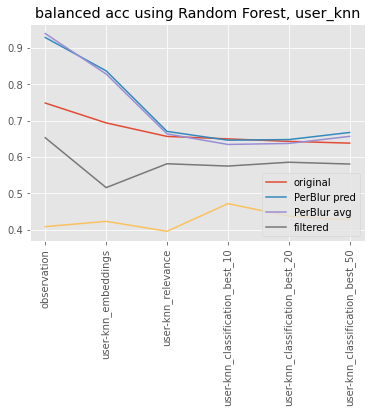

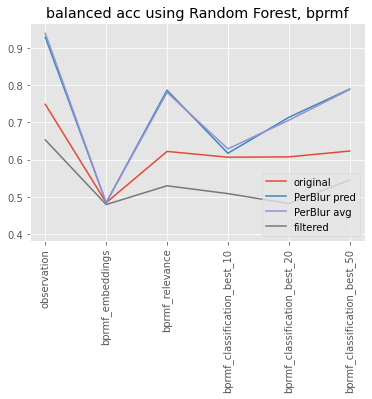

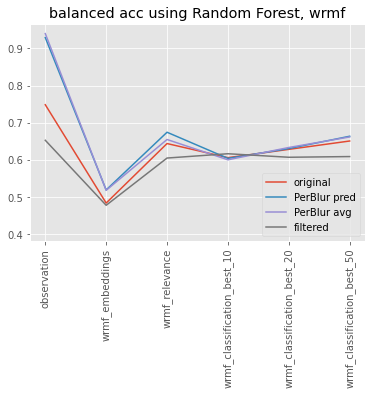

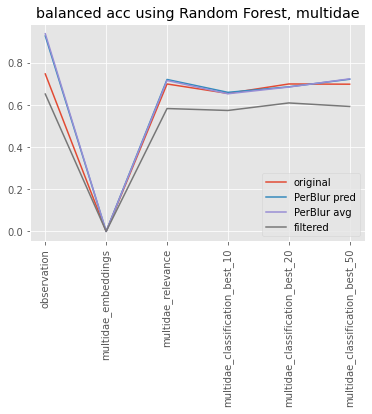

In [7]:
for i, name in required_experiments:
    _models = [original_random_forest, pred_random_forest, avg_random_forest, filtered_random_forest, fairrecsys_random_forest]
    perform_plot(_models, metrics[0], 'Random Forest, '+ name, i)


* Logistic Regression

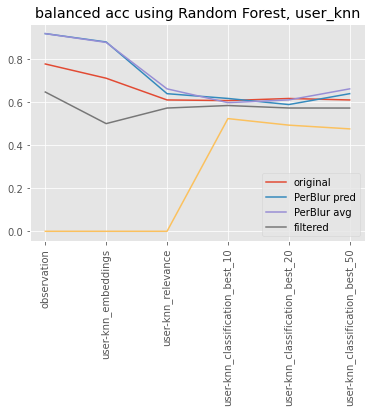

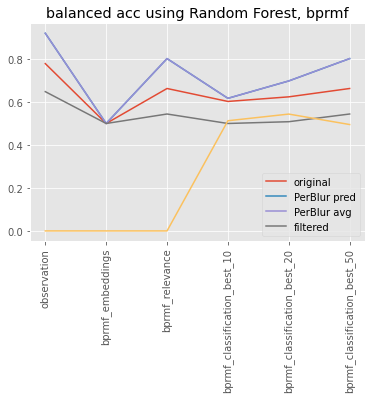

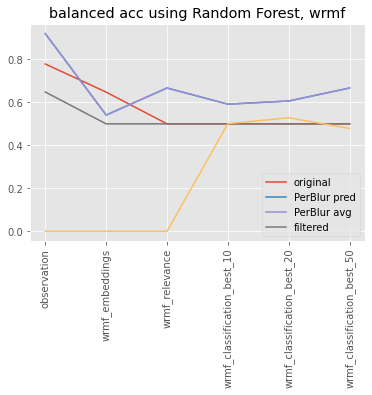

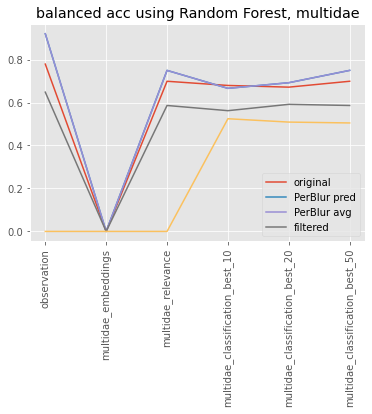

In [8]:
for i, name in required_experiments:
    _models = [original_logistic_regression, pred_logistic_regression, avg_logistic_regression, filtered_logistic_regression, fairrecsys_logistic_regression]
    perform_plot(_models, metrics[0], 'Random Forest, '+ name, i)
